# Gear

> Designing a mechanical part that can carry rotational motion

In [ ]:
from cadlab.scad import *
from solid2 import *
from math import pi, cos, sin

In [ ]:
set_global_fn(100)

A gear is a mechanical device that can be used to transmit rotational motion.
It has a flat disk shape, with teeth on the edges and a hole in the center.

The hole is there to place the gear on an axle on which it can freely rotate and the teeth are there to transmit rotational motion to other gears or other mechanical components that also have teeth that are
spaced the same way.

Note that the center does not need to be circular. For example, if you wish to attach a leaver, you can
use a square hole in order to transmit angular momentum from the leaver to the gear.

Other things are possible too. For example, you might be able to connect the gear directly to a spiraling
spring in order to act as an energy storage device.

We start by creating the base.

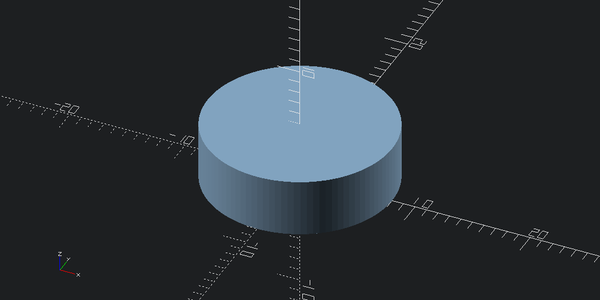

In [ ]:
gear_height = 5
radius_to_teeth = 8

base_shape = cylinder(h = gear_height, r = radius_to_teeth)
base_shape

Next, we need teeth.
Teeth would be placed repeatedly, with spaces between them equal to the teeth width.
So, once we are set to the number of teeth we want, we can compute teeth width
from

$$
\text{teeth_width} \cdot 2 \cdot \text{n_teeth} = 2 \cdot \pi \cdot \text{radius_to_teeth}
$$

In [ ]:
n_teeth = 10

teeth_width = pi * radius_to_teeth / n_teeth
teeth_width

2.5132741228718345

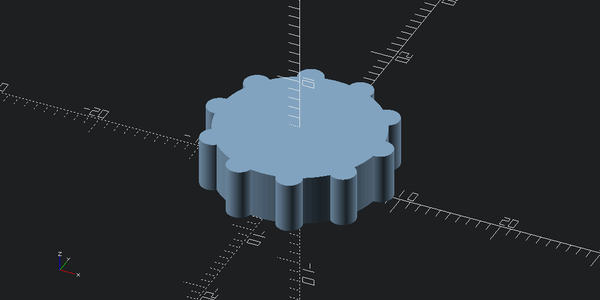

In [ ]:
with_teeth = base_shape
for i in range(n_teeth):
    with_teeth += cylinder(h = gear_height, r = teeth_width/2).translate([radius_to_teeth,0,0]).rotate([0,0,360/n_teeth*i])
with_teeth

We have teeth!
But they look a bit too short. To create a longer tooth, lets take a hull of two cylinders.

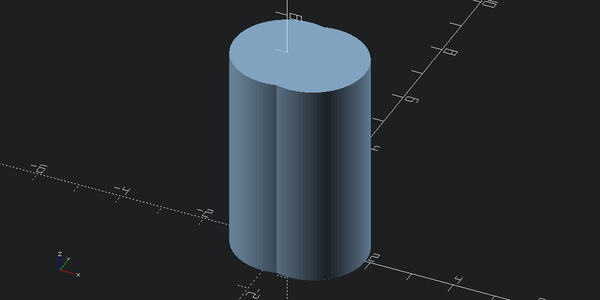

In [ ]:
teeth_offset = 0.25 * teeth_width

tooth_end = cylinder(h = gear_height, r = teeth_width/2)
tooth = tooth_end + tooth_end.translate([teeth_offset,0,0])
tooth

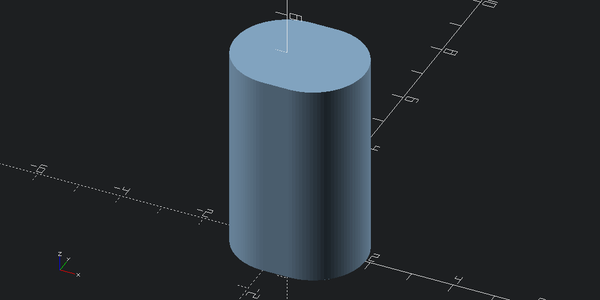

In [ ]:
tooth = tooth.hull()
tooth

We can even simplify this further since we don't need inner side to be circular:

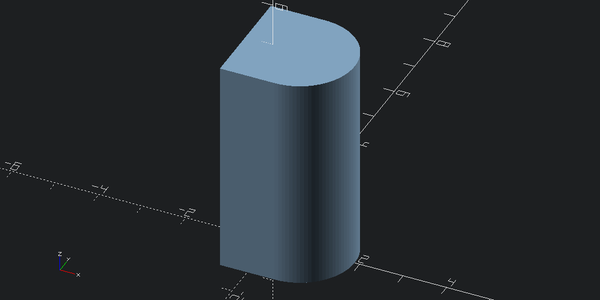

In [ ]:
tooth_end = cylinder(h = gear_height, r = teeth_width/2)
tooth = (cube([teeth_width/2, teeth_width, gear_height], center=True).translate([0,0,gear_height/2])
         + cylinder(h = gear_height, r = teeth_width/2).translate([teeth_offset,0,0]))
tooth

Now this geometry is simpler, so it will be faster to work with. Note that we don't even need hull anymore.

Lets try putting this tooth into the gear:

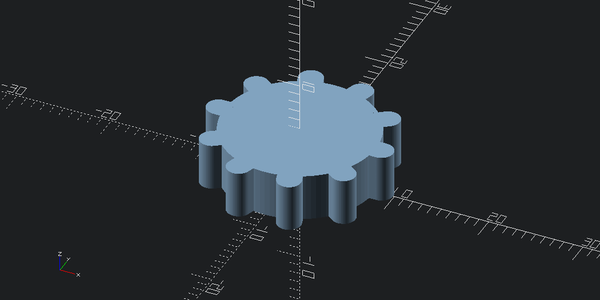

In [ ]:
with_teeth = base_shape
for i in range(n_teeth):
    with_teeth += tooth.translate([radius_to_teeth,0,0]).rotate([0,0,360/n_teeth*i])
with_teeth

Lets cut out a hole for an axle:

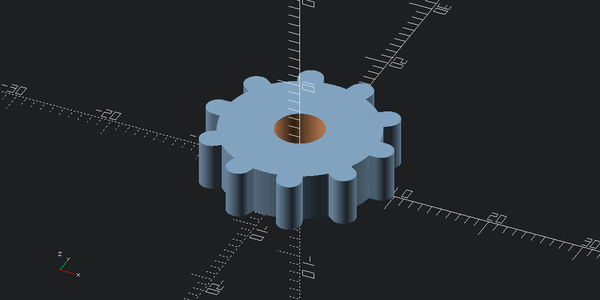

In [ ]:
axle_radius = 2.5

axle_hole = cylinder(h=gear_height*4, r=axle_radius, center=True)
gear = with_teeth - axle_hole
gear